# Generative Adversarial Network State Tomography Demo

WARNING: This particular model uses a complex deep learning model architecture built using the TensorFlow framework. It will not run unless you are using a GPU.

## Install libraries to runtime

If running in Google Colab, run the following setup cell once each time you open your project in order to install non-default package dependencies to the runtime. DO NOT RUN if you have already created a kernel with `qsttoolkit` as per the setup instructions in `README.md`.

In [1]:
!pip install qsttoolkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 24.1 MB/s eta 0:00:00


## Imports

All of QSTToolkit's features can be accessed by importing `qsttoolkit` and calling them directly. Most features sit within two main subpackages: `.data` and `.tomography`. In this example notebook, functions are called from their subpackage where relevant to show which features sit in each subpackage, and which lie in modules outside either:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import qutip as qt
import qsttoolkit as qst

## Data Preparation

We start by defining the dimensionality of our system as `Nc`, and the phase space grids for our measurement data - Husimi-Q function representations of the states in phase space. These grids are also defined to be `Nc` x `Nc` for simplicity:

In [3]:
Nc = 32
xgrid = np.linspace(-5, 5, Nc)
pgrid = np.linspace(-5, 5, Nc)

We first create test state density matrices of seven different varieties using the [QuTiP](https://qutip.org/docs/4.0.2/index.html) framework. The first three states can be produced directly using QuTiP functions, the other four are specific superpositions of Fock and coherent states and are produced using custom functions in `qsttoolkit.data`:

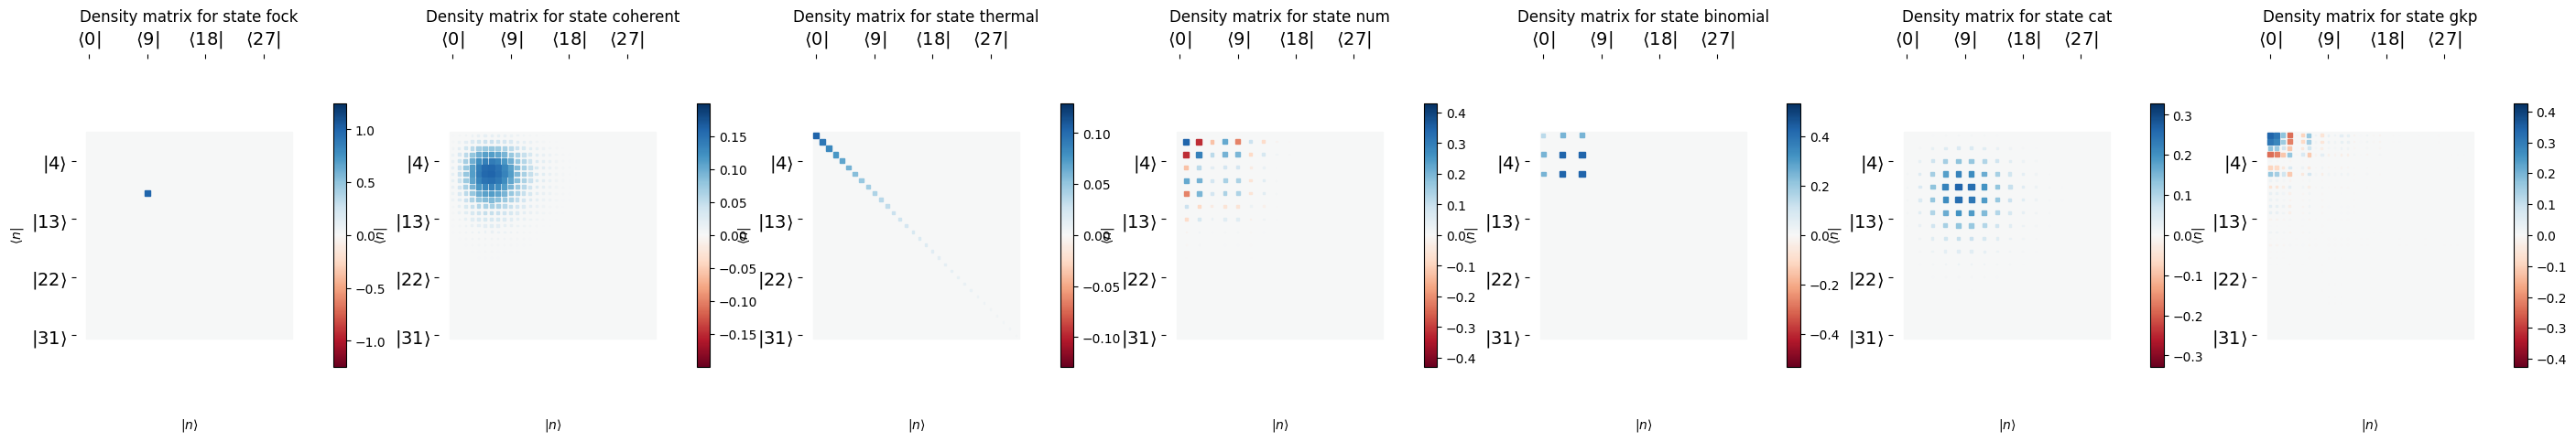

In [4]:
fock_test = qt.fock_dm(Nc, 9)
coherent_test = qt.coherent_dm(Nc, 2.5)
thermal_test = qt.thermal_dm(Nc, 9)
num_test = qt.ket2dm(qst.data.num_state('M2', Nc))
binomial_test = qt.ket2dm(qst.data.binomial_state(Nc, 2, 2, 1))
cat_test = qt.ket2dm(qst.data.cat_state(Nc, 3))
gkp_test = qt.ket2dm(qst.data.gkp_state(Nc, [-5, 5], [-5, 5], 0.5, 4.5))

fig, ax = plt.subplots(1, 7, figsize=(35, 5))
qst.plot_hinton(fock_test, ax=ax[0], label='fock')
qst.plot_hinton(coherent_test, ax=ax[1], label='coherent')
qst.plot_hinton(thermal_test, ax=ax[2], label='thermal')
qst.plot_hinton(num_test, ax=ax[3], label='num')
qst.plot_hinton(binomial_test, ax=ax[4], label='binomial')
qst.plot_hinton(cat_test, ax=ax[5], label='cat')
qst.plot_hinton(gkp_test, ax=ax[6], label='gkp')
plt.show()

We create the measurement operators for homodyne detection phase space Husimi-Q measurements of quantum states using `qsttoolkit.tomography.measurement_operators()`:

In [5]:
measurement_operators = qst.tomography.measurement_operators(Nc, 'Husimi-Q', xgrid=xgrid, pgrid=pgrid)

We then create, format and reshape the Husimi-Q measurement data for our test state. This data is defined as a single item list to calibrate with TensorFlow's input batch size definition. Redefine `test_state` below with the different states created above:

In [6]:
test_state = num_test.full()
measurement_data = [qst.expectation(test_state, measurement_operators).numpy().reshape(1, Nc**2)]

## Modelling

We create an instance of the `qsttoolkit.tomography.GANQuantumStateTomography` class, which handles the model architecture, compiling and training:

In [7]:
GAN_reconstructor = qst.tomography.GANQuantumStateTomography(dim = Nc, latent_dim = Nc)

Training the generator adversarially to learn to reconstruct the test density matrix from measurements using the `.reconstruct` method:

In [8]:
GAN_reconstructor.reconstruct(measurement_data = measurement_data,
                              measurement_operators = measurement_operators,
                              epochs=250,
                              verbose_interval=10,
                              num_progress_saves=5,
                              true_dm=num_test.full())

Epoch 0, Generator Loss: 0.686198353767395, Discriminator Loss: 0.6954149007797241


Epoch 10, Generator Loss: 0.6793525815010071, Discriminator Loss: 0.6675330400466919


Epoch 20, Generator Loss: 0.628194272518158, Discriminator Loss: 0.6737078428268433


Epoch 30, Generator Loss: 0.6097515225410461, Discriminator Loss: 0.6722966432571411


Epoch 40, Generator Loss: 0.5934460163116455, Discriminator Loss: 0.682020366191864


Epoch 50, Generator Loss: 0.6161816120147705, Discriminator Loss: 0.6712296605110168


Epoch 60, Generator Loss: 0.606257438659668, Discriminator Loss: 0.6854035258293152


Epoch 70, Generator Loss: 0.6551898121833801, Discriminator Loss: 0.6788012981414795


Epoch 80, Generator Loss: 0.6341522932052612, Discriminator Loss: 0.6884110569953918


Epoch 90, Generator Loss: 0.6380237936973572, Discriminator Loss: 0.6876261830329895


Epoch 100, Generator Loss: 0.6466185450553894, Discriminator Loss: 0.6811623573303223


Epoch 110, Generator Loss: 0.6449376344680786, Discriminator Loss: 0.6795246601104736


Epoch 120, Generator Loss: 0.6965599656105042, Discriminator Loss: 0.6510684490203857


Epoch 130, Generator Loss: 0.6322984099388123, Discriminator Loss: 0.6855026483535767


Epoch 140, Generator Loss: 0.6460813879966736, Discriminator Loss: 0.6955060958862305


Epoch 150, Generator Loss: 0.6834418177604675, Discriminator Loss: 0.69502854347229


Epoch 160, Generator Loss: 0.6983292102813721, Discriminator Loss: 0.6699817180633545


Epoch 170, Generator Loss: 0.6596521735191345, Discriminator Loss: 0.676193118095398


Epoch 180, Generator Loss: 0.633436381816864, Discriminator Loss: 0.6891129016876221


Epoch 190, Generator Loss: 0.6207523941993713, Discriminator Loss: 0.7076476812362671


Epoch 200, Generator Loss: 0.6563834547996521, Discriminator Loss: 0.6947288513183594


Epoch 210, Generator Loss: 0.6671952605247498, Discriminator Loss: 0.685761570930481


Epoch 220, Generator Loss: 0.6712090373039246, Discriminator Loss: 0.6903514862060547


Epoch 230, Generator Loss: 0.6807347536087036, Discriminator Loss: 0.6893912553787231


Epoch 240, Generator Loss: 0.6749714612960815, Discriminator Loss: 0.6962028741836548


Density matrix reconstruction complete


## Analysis

Model statistics over training progress:

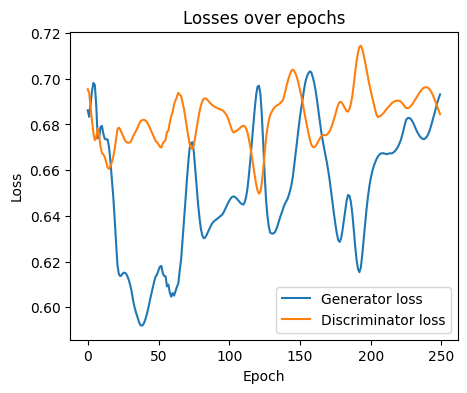

In [9]:
GAN_reconstructor.plot_losses()

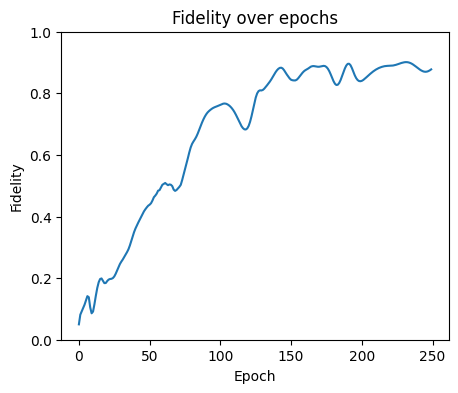

In [10]:
GAN_reconstructor.plot_fidelities()

Comparison of the true and reconstructed states:

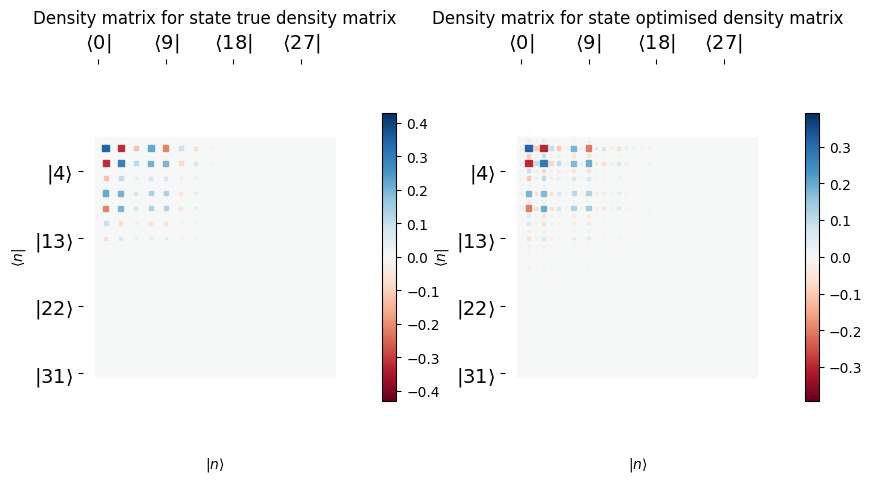

In [11]:
GAN_reconstructor.plot_comparison_hintons(num_test.full())

GANs train to find a balance between the performance of the generator and discriminator models. The plot below displays the fidelity between the true and reconstructed states for each point in the generator/discriminator loss space over the training:

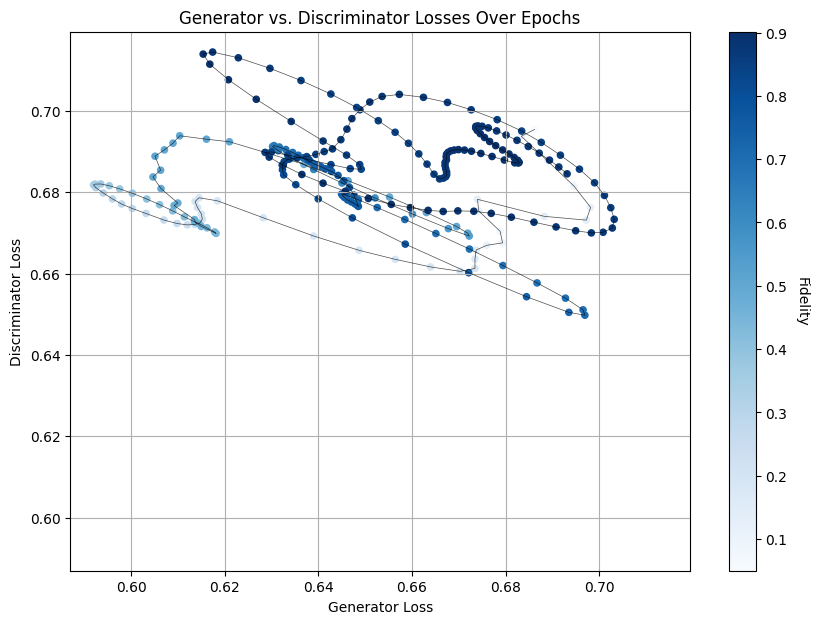

In [12]:
GAN_reconstructor.plot_loss_space()

`GANQuantumStateTomography.generator` and `GANQuantumStateTomography.discriminator` can be treated as `tensorflow.keras.Model` objects, for example:

In [13]:
GAN_reconstructor.generator.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data_vector_input (InputLayer)       │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 16, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 64)          │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 2)           │           1,026 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ density_matrix (DensityMatrix)       │ (32, 32)                    │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 626,850 (2.39 MB)

 Trainable params: 626,594 (2.39 MB)

 Non-trainable params: 256 (1.00 KB)

In [14]:
GAN_reconstructor.discriminator.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data_vector_input (InputLayer)       │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,569 (553.00 KB)

 Trainable params: 141,569 (553.00 KB)

 Non-trainable params: 0 (0.00 B)